In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bfb21f89-0f66-4430-8374-4139c6c22d2f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-07T01:00:23.816Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 8983}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [9]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950608e+07,1.950608e+07,False,NaN,1,NaN,NaN,None,2023-10-07T00:58:00.000Z,27935.959223,1.361955e+10,16.2176,-0.070657,1.756820,3.688633,8.557384,-4.354100,-7.924104,5.449209e+11,49.7653,5.866551e+11,None,2023-10-07T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:00:32.555484
1,1027,Ethereum,ETH,ethereum,7491,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202444e+08,1.202444e+08,True,NaN,2,NaN,NaN,None,2023-10-07T00:58:00.000Z,1645.781981,4.919381e+09,-7.8402,-0.014529,1.775126,-1.570192,0.840611,-10.143434,-11.836110,1.978961e+11,18.0695,1.978961e+11,None,2023-10-07T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:00:32.555484
2,825,Tether USDt,USDT,tether,63223,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,None,2023-10-07T00:58:00.000Z,1.000366,1.920393e+10,3.1840,-0.008453,0.024449,0.043987,0.085190,0.152788,0.001751,8.339743e+10,7.6143,8.645736e+10,None,2023-10-07T00:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-07 01:00:32.555484
3,1839,BNB,BNB,bnb,1662,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538459e+08,1.538459e+08,False,NaN,4,NaN,NaN,None,2023-10-07T00:58:00.000Z,213.571862,2.742898e+08,-21.8160,0.007363,1.144731,-0.969410,-0.654357,-11.771987,-9.725319,3.285716e+10,3.0007,3.285716e+10,None,2023-10-07T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:00:32.555484
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,None,2023-10-07T00:58:00.000Z,0.525018,6.801438e+08,-15.7670,-0.222062,0.114594,1.358424,4.848943,-15.551772,11.463118,2.802931e+10,2.5593,5.250183e+10,None,2023-10-07T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:00:32.555484
5,3408,USDC,USDC,usd-coin,14332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.549890e+10,2.549890e+10,False,NaN,6,NaN,NaN,None,2023-10-07T00:58:00.000Z,0.999858,2.585136e+09,-1.5053,-0.014500,-0.002954,-0.017741,-0.035032,-0.022633,-0.033564,2.549529e+10,2.3277,2.549529e+10,None,2023-10-07T00:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-07 01:00:32.555484
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.141074e+08,5.591582e+08,True,NaN,7,NaN,NaN,None,2023-10-07T00:58:00.000Z,23.580869,4.028933e+08,16.0164,0.665522,2.724751,15.518583,20.386744,1.806133,7.509568,9.765012e+09,0.8916,1.318544e+10,None,2023-10-07T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:00:32.555484
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514854e+10,3.622901e+10,False,NaN,8,NaN,NaN,None,2023-10-07T00:58:00.000Z,0.265270,9.464546e+07,-8.6755,0.149864,1.251841,5.972400,2.981609,-8.901559,-8.832640,9.323871e+09,0.8513,1.193717e+10,None,2023-10-07T00:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:00:32.555484
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.413069e

In [15]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'bfb21f89-0f66-4430-8374-4139c6c22d2f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2= pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
      
   # if not os.path.isfile(r'C:\Users\suvar\Documents\Python Tutorials\API.csv'):
       #  df.to_csv(r'C:\Users\suvar\Documents\Python Tutorials\API.csv', header = 'column_names')
    #else:
       #  df.to_csv(r'C:\Users\suvar\Documents\Python Tutorials\API.csv',mode= 'a', header = False)

In [16]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed Successully")
    sleep(60)
exit()    

C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successully


C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successully


C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successully


C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successully


C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successully


C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\suvar\AppData\Local\Temp\ipykernel_6148\3709243129.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successully


KeyboardInterrupt: 

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950608e+07,1.950608e+07,False,NaN,1,NaN,NaN,None,2023-10-07T01:13:00.000Z,27952.911116,1.358856e+10,16.5130,0.030324,1.664086,3.804814,8.539256,-4.149435,-8.060598,5.452516e+11,49.7683,5.870111e+11,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
1,1027,Ethereum,ETH,ethereum,7491,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202444e+08,1.202444e+08,True,NaN,2,NaN,NaN,None,2023-10-07T01:13:00.000Z,1646.357646,4.909101e+09,-7.5860,-0.028472,1.671541,-1.405965,0.825941,-10.005608,-12.152587,1.979654e+11,18.0700,1.979654e+11,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
2,825,Tether USDt,USDT,tether,63223,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,None,2023-10-07T01:13:00.000Z,1.000518,1.918251e+10,3.5164,0.005136,0.043437,0.052809,0.100241,0.166630,0.021935,8.341009e+10,7.6127,8.647049e+10,None,2023-10-07T01:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-07 01:15:35.735076
3,1839,BNB,BNB,bnb,1662,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538459e+08,1.538459e+08,False,NaN,4,NaN,NaN,None,2023-10-07T01:13:00.000Z,213.695152,2.753156e+08,-21.2148,-0.024000,1.125514,-0.886062,-0.629821,-11.608427,-9.832806,3.287613e+10,3.0008,3.287613e+10,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,None,2023-10-07T01:13:00.000Z,0.525320,6.770240e+08,-15.5100,-0.142733,0.073051,1.450096,4.818284,-15.327222,11.438854,2.804543e+10,2.5599,5.253202e+10,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
5,3408,USDC,USDC,usd-coin,14332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.549890e+10,2.549890e+10,False,NaN,6,NaN,NaN,None,2023-10-07T01:13:00.000Z,0.999969,2.581182e+09,-1.1587,-0.000619,0.006909,-0.009507,-0.010521,-0.013852,-0.023103,2.549811e+10,2.3274,2.549811e+10,None,2023-10-07T01:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-07 01:15:35.735076
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.141074e+08,5.591582e+08,True,NaN,7,NaN,NaN,None,2023-10-07T01:13:00.000Z,23.590443,4.002751e+08,16.6438,0.432555,2.718509,15.851397,19.898172,2.047413,5.682361,9.768977e+09,0.8917,1.319079e+10,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514854e+10,3.622901e+10,False,NaN,8,NaN,NaN,None,2023-10-07T01:13:00.000Z,0.265038,9.420280e+07,-9.4423,-0.119785,0.868922,5.833466,2.738447,-8.872251,-9.036824,9.315686e+09,0.8502,1.192669e+10,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.413069e+

In [18]:
pd.set_option ('display.float_format', lambda x: '%.5f' % x)

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19506075.00000,19506075.00000,False,NaN,1,NaN,NaN,None,2023-10-07T01:13:00.000Z,27952.91112,13588558194.12175,16.51300,0.03032,1.66409,3.80481,8.53926,-4.14943,-8.06060,545251580689.78143,49.76830,587011133428.19995,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
1,1027,Ethereum,ETH,ethereum,7491,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120244439.39826,120244439.39826,True,NaN,2,NaN,NaN,None,2023-10-07T01:13:00.000Z,1646.35765,4909100756.76404,-7.58600,-0.02847,1.67154,-1.40596,0.82594,-10.00561,-12.15259,197965352196.55405,18.07000,197965352196.54999,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
2,825,Tether USDt,USDT,tether,63223,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83366897433.59711,86425711834.21460,True,NaN,3,NaN,NaN,None,2023-10-07T01:13:00.000Z,1.00052,19182507543.65680,3.51640,0.00514,0.04344,0.05281,0.10024,0.16663,0.02193,83410088067.27434,7.61270,86470487175.21001,None,2023-10-07T01:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-07 01:15:35.735076
3,1839,BNB,BNB,bnb,1662,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845911.01345,153845911.01345,False,NaN,4,NaN,NaN,None,2023-10-07T01:13:00.000Z,213.69515,275315593.01778,-21.21480,-0.02400,1.12551,-0.88606,-0.62982,-11.60843,-9.83281,32876125414.65298,3.00080,32876125414.65000,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53387299665.00000,99988380689.00000,False,NaN,5,NaN,NaN,None,2023-10-07T01:13:00.000Z,0.52532,677023992.95474,-15.51000,-0.14273,0.07305,1.45010,4.81828,-15.32722,11.43885,28045428924.56495,2.55990,52532023722.02000,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
5,3408,USDC,USDC,usd-coin,14332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25498898332.36741,25498898332.36741,False,NaN,6,NaN,NaN,None,2023-10-07T01:13:00.000Z,0.99997,2581181571.69780,-1.15870,-0.00062,0.00691,-0.00951,-0.01052,-0.01385,-0.02310,25498113348.08644,2.32740,25498113348.09000,None,2023-10-07T01:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-07 01:15:35.735076
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,414107393.79726,559158171.42437,True,NaN,7,NaN,NaN,None,2023-10-07T01:13:00.000Z,23.59044,400275072.28774,16.64380,0.43256,2.71851,15.85140,19.89817,2.04741,5.68236,9768976986.36024,0.89170,13190789129.10000,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-07 01:15:35.735076
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35148542056.44300,36229014789.87600,False,NaN,8,NaN,NaN,None,2023-10-07T01:13:00.000Z,0.26504,94202804.44153,-9.44230,-0.11979,0.86892,5.83347,2.73845,-8.87225,-9.03682,9315685681.96585,0.85020,11926692578.47000,None,2023-10-07T01:13:00.000Z,NaN,NaN,NaN,NaN,

In [20]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07156,1.66749,3.81037,8.53619,-4.15019,-8.04286
Ethereum,-0.00449,1.69554,-1.37137,0.82973,-9.98811,-12.11481
Tether USDt,0.00057,0.03713,0.05081,0.09992,0.15868,0.02086
BNB,-0.02634,1.12191,-0.86221,-0.62600,-11.60931,-9.82784
XRP,-0.12890,0.06285,1.48058,4.82922,-15.30290,11.45057
USDC,-0.00257,0.00005,-0.00881,-0.01213,-0.01891,-0.02186
Solana,0.31857,2.71972,15.92311,19.96319,2.09168,5.71623
Cardano,-0.14508,0.84816,5.79846,2.74617,-8.85998,-9.01628
Dogecoin,0.02949,0.80829,-0.97197,-3.27003,-16.02841,-6.91701


In [21]:
df4 =  df3.stack()

df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.07156
             quote.USD.percent_change_24h     1.66749
             quote.USD.percent_change_7d      3.81037
             quote.USD.percent_change_30d     8.53619
             quote.USD.percent_change_60d    -4.15019
             quote.USD.percent_change_90d    -8.04286
Ethereum     quote.USD.percent_change_1h     -0.00449
             quote.USD.percent_change_24h     1.69554
             quote.USD.percent_change_7d     -1.37137
             quote.USD.percent_change_30d     0.82973
             quote.USD.percent_change_60d    -9.98811
             quote.USD.percent_change_90d   -12.11481
Tether USDt  quote.USD.percent_change_1h      0.00057
             quote.USD.percent_change_24h     0.03713
             quote.USD.percent_change_7d      0.05081
             quote.USD.percent_change_30d     0.09992
             quote.USD.percent_change_60d     0.15868
             quote.USD.percent_change_90

In [22]:
type(df4)

pandas.core.series.Series

In [23]:
df5 = df4.to_frame(name = 'Values')

df5

Values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.07156
            quote.USD.percent_change_24h   1.66749
            quote.USD.percent_change_7d    3.81037
            quote.USD.percent_change_30d   8.53619
            quote.USD.percent_change_60d  -4.15019
            quote.USD.percent_change_90d  -8.04286
Ethereum    quote.USD.percent_change_1h   -0.00449
            quote.USD.percent_change_24h   1.69554
            quote.USD.percent_change_7d   -1.37137
            quote.USD.percent_change_30d   0.82973
            quote.USD.percent_change_60d  -9.98811
            quote.USD.percent_change_90d -12.11481
Tether USDt quote.USD.percent_change_1h    0.00057
            quote.USD.percent_change_24h   0.03713
            quote.USD.percent_change_7d    0.05081
            quote.USD.percent_change_30d   0.09992
            quote.USD.percent_change_60d   0.15868
            quote.USD.percent_change_90d   0.02086
BNB         quote.USD.percent_change_1h   -0.02634
            quote.USD.percent_change_24h   1.12191
            quote.USD.percent_change_7d   -0.86221
            quote.USD.percent_change_30d  -0.62600
            quote.USD.percent_change_60d -11.60931
            quote.USD.percent_change_90d  -9.82784
XRP         quote.USD.percent_change_1h   -0.12890
            quote.USD.percent_change_24h   0.06285
            quote.USD.percent_change_7d    1.48058
            quote.USD.percent_change_30d   4.82922
            quote.USD.percent_change_60d -15.30290
            quote.USD.percent_change_90d  11.45057
USDC        quote.USD.percent_change_1h   -0.00257
            quote.USD.percent_change_24h   0.00005
            quote.USD.percent_change_7d   -0.00881
            quote.USD.percent_change_30d  -0.01213
            quote.USD.percent_change_60d  -0.01891
            quote.USD.percent_change_90d  -0.02186
Solana      quote.USD.percent_change_1h    0.31857
            quote.USD.percent_change_24h   2.71972
            quote.USD.percent_change_7d   15.92311
            quote.USD.percent_change_30d  19.96319
            quote.USD.percent_change_60d   2.09168
            quote.USD.percent_change_90d   5.71623
Cardano     quote.USD.percent_change_1h   -0.14508
            quote.USD.percent_change_24h   0.84816
            quote.USD.percent_change_7d    5.79846
            quote.USD.percent_change_30d   2.74617
            quote.USD.percent_change_60d  -8.85998
            quote.USD.percent_change_90d  -9.01628
Dogecoin    quote.USD.percent_change_1h    0.02949
            quote.USD.percent_change_24h   0.80829
            quote.USD.percent_change_7d   -0.97197
            quote.USD.percent_change_30d  -3.27003
            quote.USD.percent_change_60d -16.02841
            quote.USD.percent_change_90d  -6.91701
TRON        quote.USD.percent_change_1h    0.20961
            quote.USD.percent_change_24h  -1.03449
            quote.USD.percent_change_7d   -1.44330
            quote.USD.percent_change_30d  10.82431
            quote.USD.percent_change_60d  14.23892
            quote.USD.percent_change_90d   9.09833
Toncoin     quote.USD.percent_change_1h    0.06897
            quote.USD.percent_change_24h   3.97240
            quote.USD.percent_change_7d   -0.68506
            quote.USD.percent_change_30d  18.13293
            quote.USD.percent_change_60d  78.80365
            quote.USD.percent_change_90d  56.09747
Dai         quote.USD.percent_change_1h    0.00775
            quote.USD.percent_change_24h  -0.00084
            quote.USD.percent_change_7d    0.00086
            quote.USD.percent_change_30d   0.00825
            quote.USD.percent_change_60d   0.01600
            quote.USD.percent_change_90d  -0.05804
Polygon     quote.USD.percent_change_1h    0.77414
            quote.USD.percent_change_24h   3.96476
            quote.USD.percent_change_7d    8.38783
            quote.USD.percent_change_30d   1.99947
            quote.USD.percent_change_60d -14.03642
            quo

In [24]:
df5.count()

Values    90
dtype: int64

In [25]:
index = pd.Index(range(90))

df6  = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,0.07156
1,Bitcoin,quote.USD.percent_change_24h,1.66749
2,Bitcoin,quote.USD.percent_change_7d,3.81037
3,Bitcoin,quote.USD.percent_change_30d,8.53619
4,Bitcoin,quote.USD.percent_change_60d,-4.15019
5,Bitcoin,quote.USD.percent_change_90d,-8.04286
6,Ethereum,quote.USD.percent_change_1h,-0.00449
7,Ethereum,quote.USD.percent_change_24h,1.69554
8,Ethereum,quote.USD.percent_change_7d,-1.37137
9,Ethereum,quote.USD.percent_change_30d,0.82973


In [26]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,0.07156
1,Bitcoin,quote.USD.percent_change_24h,1.66749
2,Bitcoin,quote.USD.percent_change_7d,3.81037
3,Bitcoin,quote.USD.percent_change_30d,8.53619
4,Bitcoin,quote.USD.percent_change_60d,-4.15019
5,Bitcoin,quote.USD.percent_change_90d,-8.04286
6,Ethereum,quote.USD.percent_change_1h,-0.00449
7,Ethereum,quote.USD.percent_change_24h,1.69554
8,Ethereum,quote.USD.percent_change_7d,-1.37137
9,Ethereum,quote.USD.percent_change_30d,0.82973


In [27]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,Values
0,Bitcoin,1h,0.07156
1,Bitcoin,24h,1.66749
2,Bitcoin,7d,3.81037
3,Bitcoin,30d,8.53619
4,Bitcoin,60d,-4.15019
5,Bitcoin,90d,-8.04286
6,Ethereum,1h,-0.00449
7,Ethereum,24h,1.69554
8,Ethereum,7d,-1.37137
9,Ethereum,30d,0.82973


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

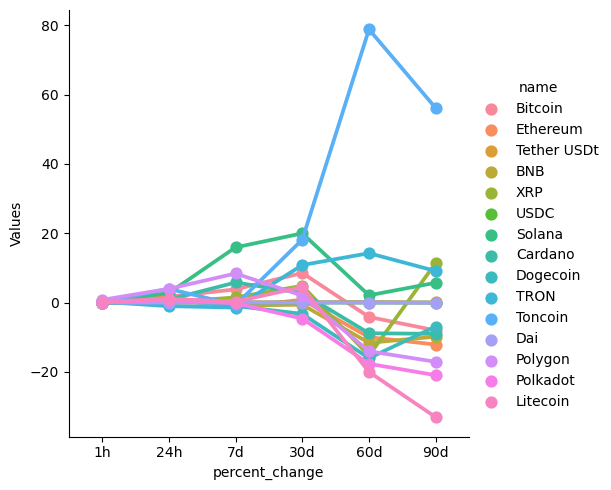

In [29]:
sns.catplot(x='percent_change', y='Values', hue='name', data=df7, kind='point')

In [30]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27952.91112,2023-10-07 01:15:35.735076
0,Bitcoin,27952.91112,2023-10-07 01:16:17.904190
0,Bitcoin,27952.64547,2023-10-07 01:17:18.177484
0,Bitcoin,27953.77031,2023-10-07 01:18:18.402832
0,Bitcoin,27951.22871,2023-10-07 01:19:18.745745
0,Bitcoin,27944.85349,2023-10-07 01:20:19.024840
0,Bitcoin,27942.08721,2023-10-07 01:21:19.445439


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

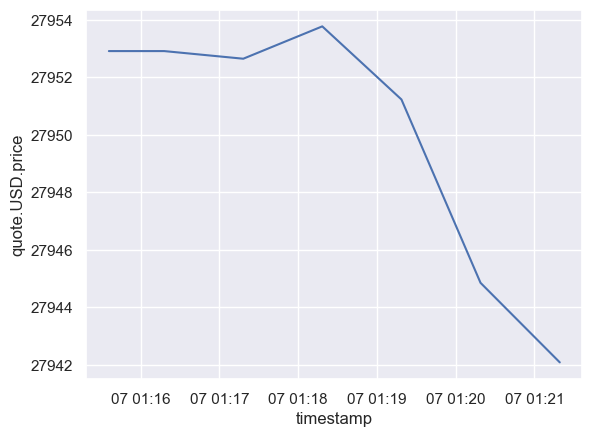

In [31]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)